In [37]:
# Packages load

import pandas as pd
import numpy as np
from numpy import linspace
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from scipy.stats import norm
from sklearn.feature_selection import RFECV

In [25]:
# load of dataset as a pandas dataframe
dtCancer = load_breast_cancer(as_frame=True)

In [26]:
# split of test and train sets
x = dtCancer.data
y = dtCancer.target


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=5)

In [31]:
# generate prelimonary model
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_predict = svc_model.predict(X_test)

cmI = confusion_matrix(y_test, y_predict, normalize=None)
accu = accuracy_score(y_test, y_predict)
prec = precision_score(y_test, y_predict)
rec = recall_score(y_test, y_predict)
print(f"Matriz de confusão:\n {cmI}")
print(f"Acurácia: {accu}")
print(f"Precisão: {prec}")
print(f"Recall: {rec}")


Matriz de confusão:
 [[41  7]
 [ 0 66]]
Acurácia: 0.9385964912280702
Precisão: 0.9041095890410958
Recall: 1.0


<ipython-input-33-5874b428654f>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


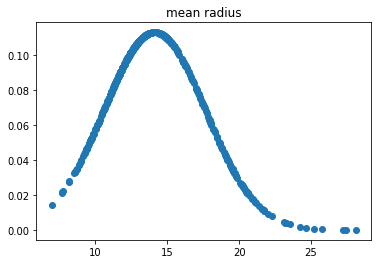

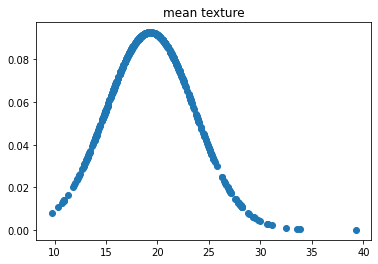

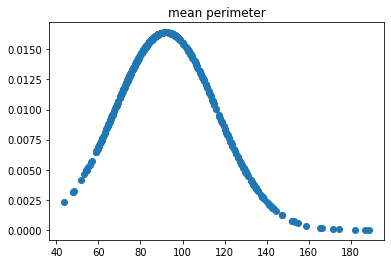

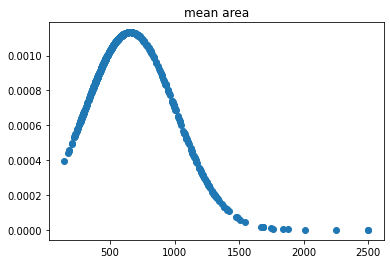

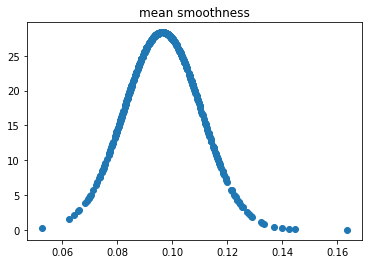

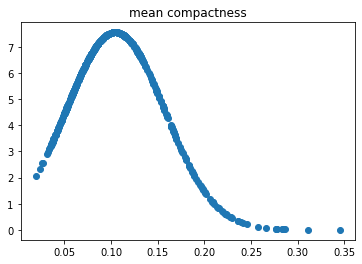

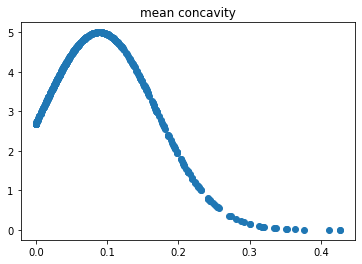

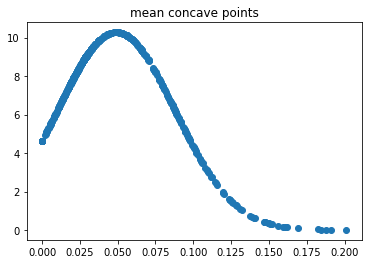

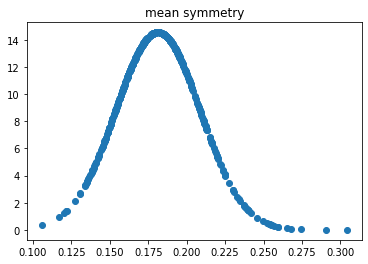

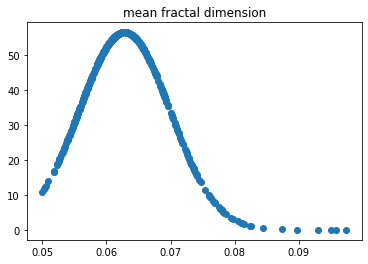

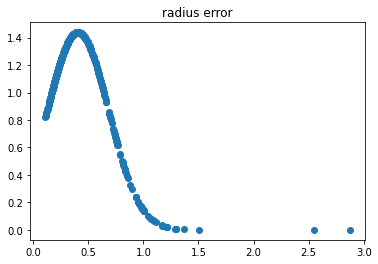

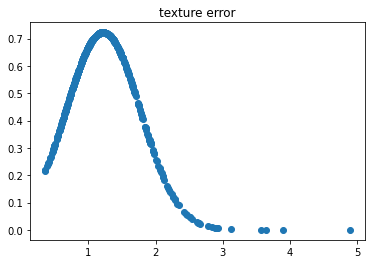

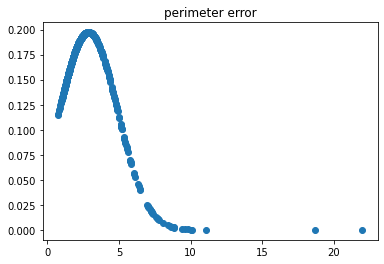

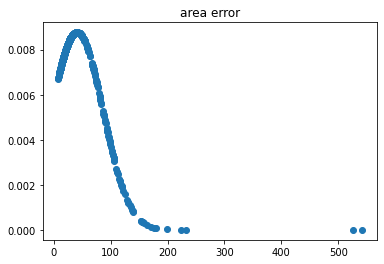

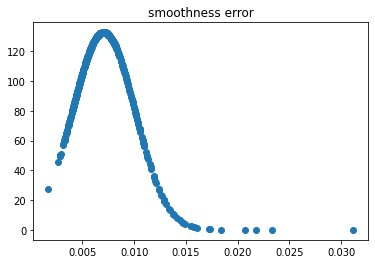

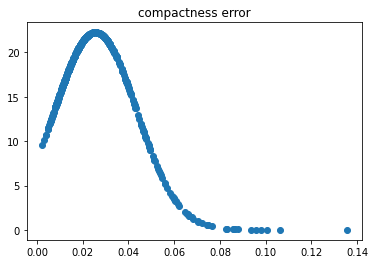

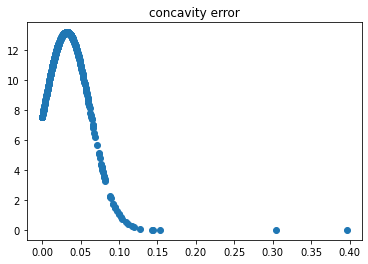

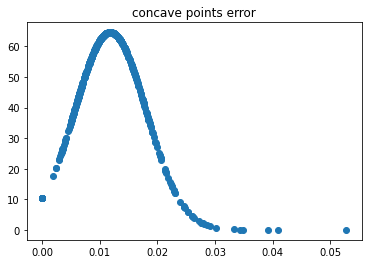

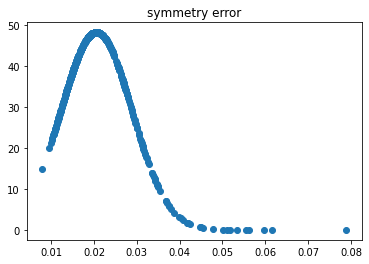

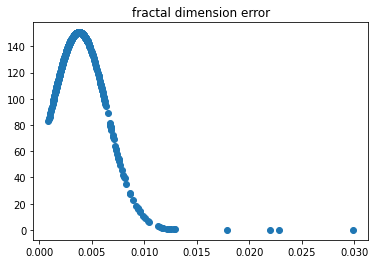

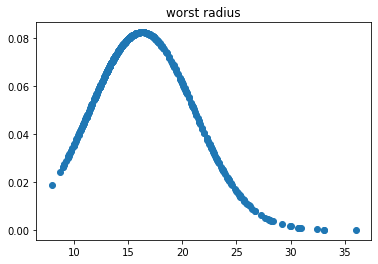

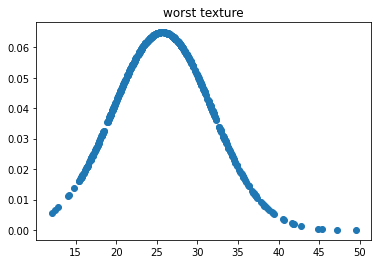

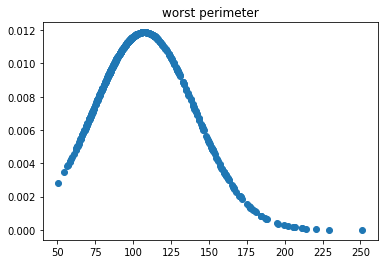

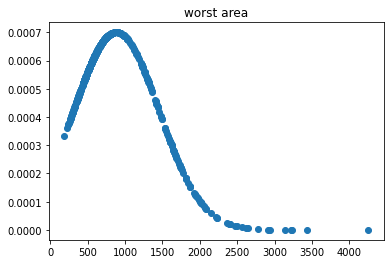

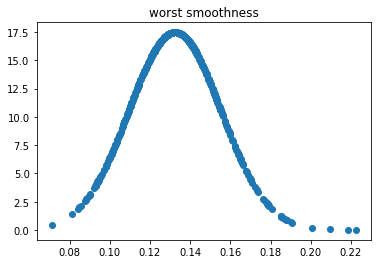

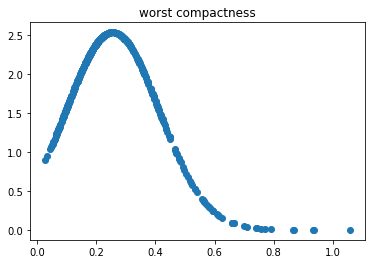

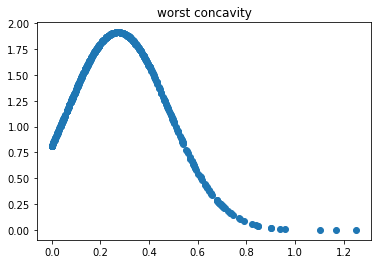

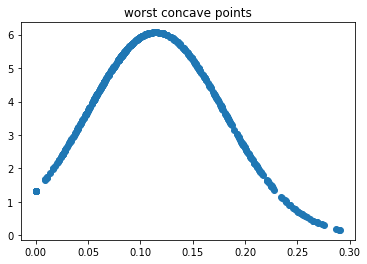

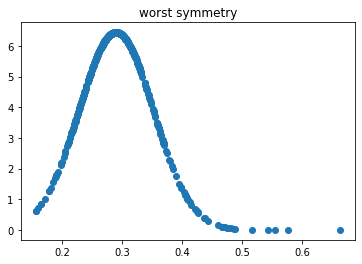

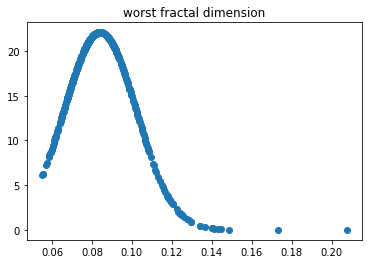

In [33]:
# distribution analysis of atributes
for atr in dtCancer.feature_names:
    xs = x[atr]
    mean = xs.mean()
    std = xs.std()
    ys = norm(mean, std).pdf(xs)
    plt.figure()
    plt.plot(xs,ys,'o')
    plt.title(atr)

In [21]:
# Analysis of correlation of mean atributes
df_mean = dtCancer.data.iloc[:, :10]
df_mean.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


In [22]:
# Analysis of correlation of error atributes
df_mean = dtCancer.data.iloc[:, 11:20]
df_mean.corr()

,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error
texture error,1.000000,0.223171,0.111567,0.397243,0.231700,0.194998,0.230283,0.411621,0.279723
perimeter error,0.223171,1.000000,0.937655,0.151075,0.416322,0.362482,0.556264,0.266487,0.244143
area error,0.111567,0.937655,1.000000,0.075150,0.284840,0.270895,0.415730,0.134109,0.127071
smoothness error,0.397243,0.151075,0.075150,1.000000,0.336696,0.268685,0.328429,0.413506,0.427374
compactness error,0.231700,0.416322,0.284840,0.336696,1.000000,0.801268,0.744083,0.394713,0.803269
concavity error,0.194998,0.362482,0.270895,0.268685,0.801268,1.000000,0.771804,0.309429,0.727372
concave points error,0.230283,0.556264,0.415730,0.328429,0.744083,0.771804,1.000000,0.312780,0.611044
symmetry error,0.411621,0.266487,0.134109,0.413506,0.394713,0.309429,0.312780,1.000000,0.369078
fractal dimension error,0.279723,0.244143,0.127071,0.427374,0.803269,0.727372,0.611044,0.369078,1.000000


In [34]:
# Normalize the atributes
x_min = x.min()
df_range = x.max() - x_min
x_scaled = (x - x_min)/ df_range


<ipython-input-38-6329c6d4e783>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


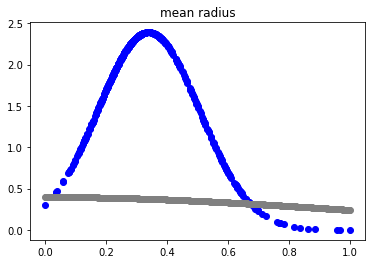

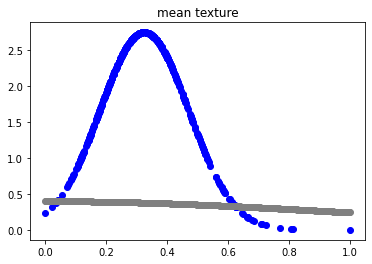

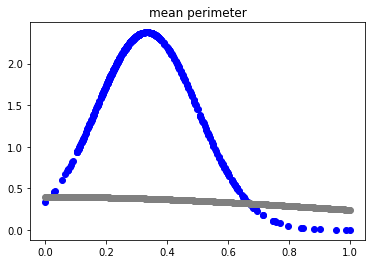

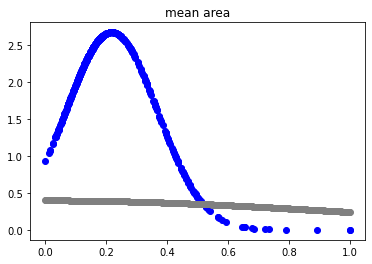

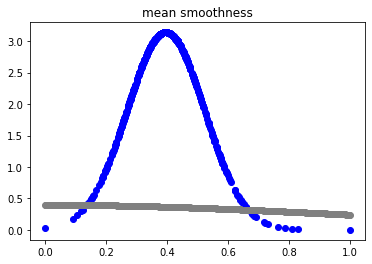

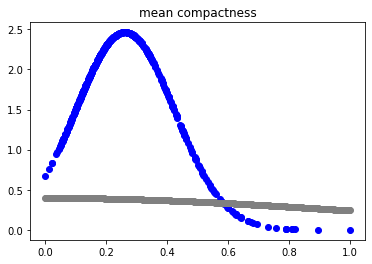

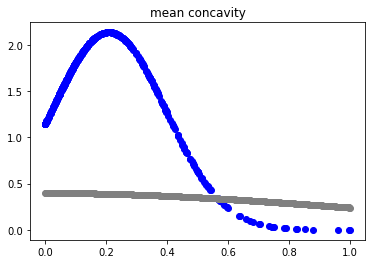

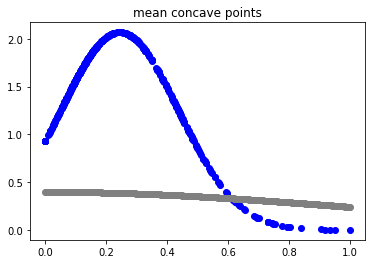

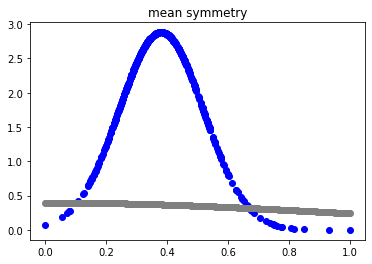

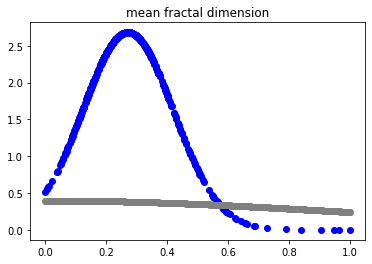

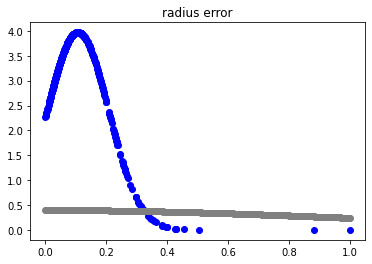

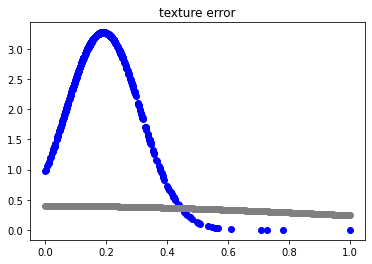

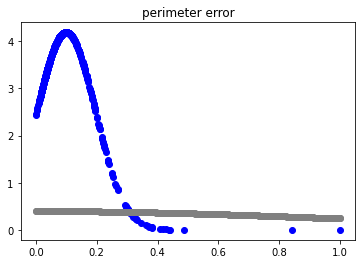

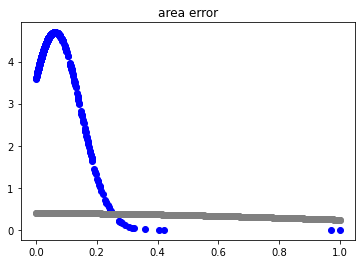

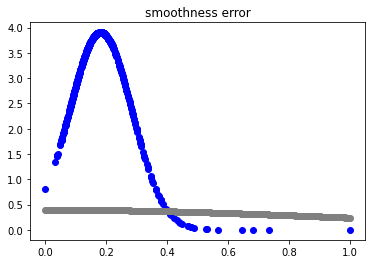

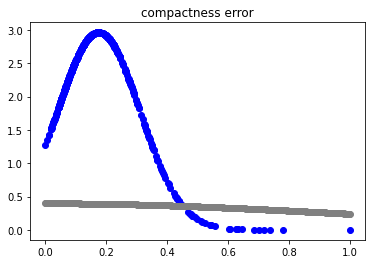

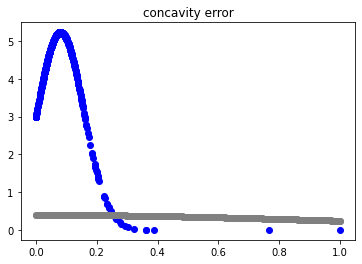

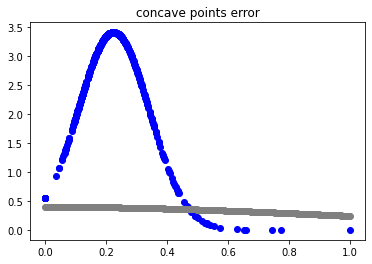

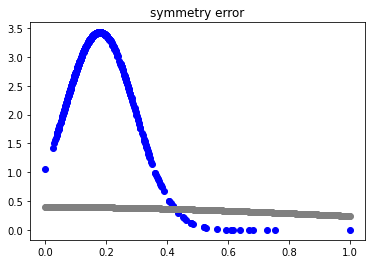

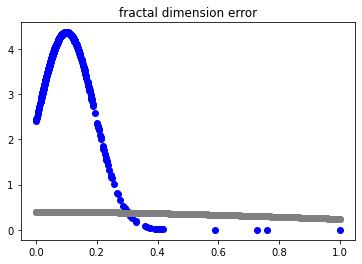

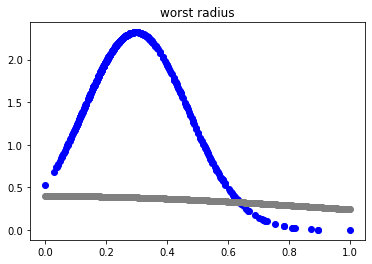

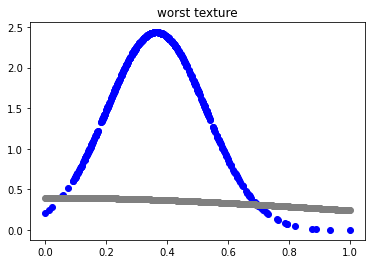

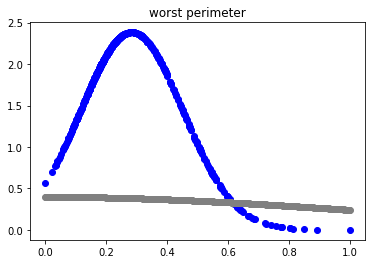

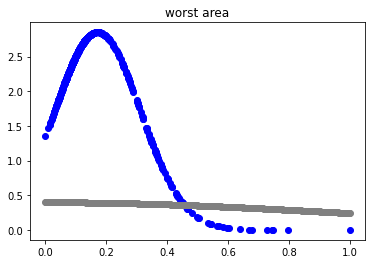

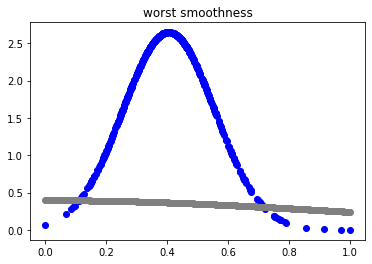

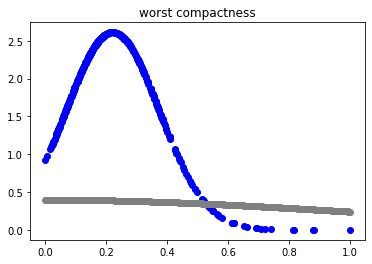

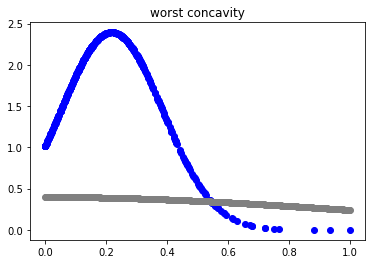

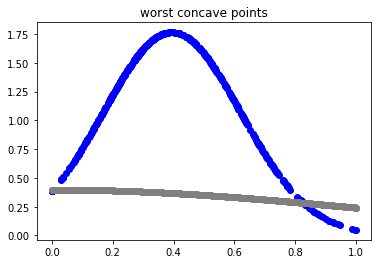

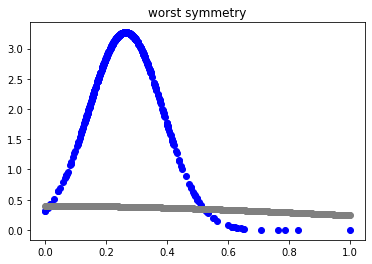

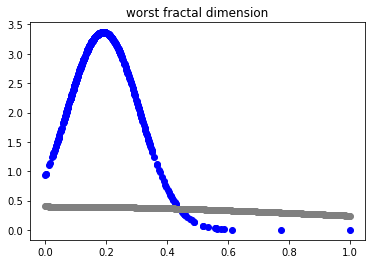

In [38]:
for atr in dtCancer.feature_names:
    xs = x_scaled[atr]
    mean = xs.mean()
    std = xs.std()
    ys = norm(mean, std).pdf(xs)
    xsn = linspace(xs.min(),xs.max(), len(xs))
    ysn = norm(0,1).pdf(xsn)
    plt.figure()
    plt.plot(xs,ys,'o', color = 'blue')
    plt.plot(xsn, ysn, 'o', color = 'grey')
    plt.title(atr)

In [ ]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(x_scaled, y, test_size=0.20, random_state=5)

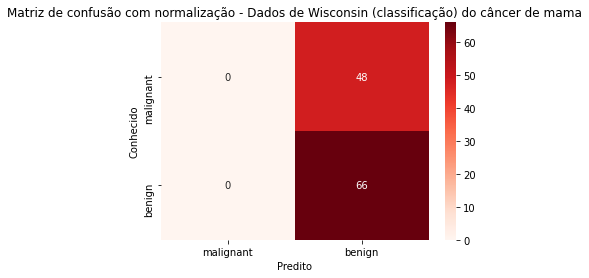


TP  = 0.00
TN  = 66.00
FN  = 48.00
FP  = 0.00

Acurácia                  (TP+TN)/n    = 0.57895 ou 57.89%
Precisão                  TP/(TP+FP)   = nan ou nan%
Sensibilidade (recall)    TP/(TP+FN)   = 0.00000 ou 0.00%

__________________________________________________________



<ipython-input-140-e87679511bae>:26: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)


In [ ]:
# generate prelimonary model
svc_model_scaled = SVC()
svc_model_scaled.fit(X_train_scaled, y_train_scaled)
y_predict = svc_model.predict(X_test_scaled)

cmI = confusion_matrix(y_test_scaled, y_predict, normalize=None)
plt.title('Matriz de confusão com normalização - Dados de Wisconsin (classificação) do câncer de mama')

ax = sns.heatmap(cmI, annot = True, cmap=plt.cm.Reds) 
ax.set_ylim (2.0, 0)
ax.xaxis.set_ticklabels(['malignant', 'benign'])
ax.yaxis.set_ticklabels(['malignant', 'benign'])

plt.xlabel('Predito')
plt.ylabel('Conhecido')
plt.show()

tp = cmI[0][0]
tn = cmI[1][1]

fn = cmI[0][1]
fp = cmI[1][0]
n  = tp + tn + fn + fp

recall = tp/(tp + fn)   
precision = tp / (tp + fp)  
accuracy = (tp + tn)/n      

print("") 
print("TP  = {:.2f}".format(tp))
print("TN  = {:.2f}".format(tn))
print("FN  = {:.2f}".format(fn))
print("FP  = {:.2f}".format(fp))

print("") 
print("Acurácia                  (TP+TN)/n    = {:.5f}".format(accuracy) + " ou {:.2f}%".format(accuracy*100))
print("Precisão                  TP/(TP+FP)   = {:.5f}".format(precision)+ " ou {:.2f}%".format(precision*100))
print("Sensibilidade (recall)    TP/(TP+FN)   = {:.5f}".format(recall)+ " ou {:.2f}%".format(recall*100))

print("") 
print("__________________________________________________________")
print("")  

